In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.datasets import copper
from statsmodels.formula.api import ols
from statsmodels.stats.anova import anova_lm
from sklearn.linear_model import LinearRegression
import statsmodels.formula.api as sm

In [2]:
from statsmodels.datasets import copper
prices = copper.data.load_pandas()
prices['data']      

,WORLDCONSUMPTION,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,3173.0,26.56,0.70,19.76,0.98,1.0
1,3281.1,27.31,0.71,20.78,1.04,2.0
2,3135.7,32.95,0.72,22.55,1.05,3.0
3,3359.1,33.90,0.70,23.06,0.97,4.0
4,3755.1,42.70,0.74,24.93,1.02,5.0
5,3875.9,46.11,0.74,26.50,1.04,6.0
6,3905.7,31.70,0.74,27.24,0.98,7.0
7,3957.6,27.23,0.72,26.21,0.98,8.0
8,4279.1,32.89,0.75,26.09,1.03,9.0
9,4627.9,33.78,0.77,27.40,1.03,10.0


In [3]:
prices['data'].columns  #checking all columns

Index(['WORLDCONSUMPTION', 'COPPERPRICE', 'INCOMEINDEX', 'ALUMPRICE',
       'INVENTORYINDEX', 'TIME'],
      dtype='object')

In [4]:
prices['data'].mean()     #calculating mean value for all variables

WORLDCONSUMPTION    5433.6320
COPPERPRICE           37.1684
INCOMEINDEX            0.8664
ALUMPRICE             24.2920
INVENTORYINDEX         1.0056
TIME                  13.0000
dtype: float64

In [5]:
prices['data'].info()   # to show data type and check there is null date or not.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 6 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   WORLDCONSUMPTION  25 non-null     float64
 1   COPPERPRICE       25 non-null     float64
 2   INCOMEINDEX       25 non-null     float64
 3   ALUMPRICE         25 non-null     float64
 4   INVENTORYINDEX    25 non-null     float64
 5   TIME              25 non-null     float64
dtypes: float64(6)
memory usage: 1.3 KB


In [6]:
X = prices['data'].iloc[:,1:6]    # explanatory variables
y = prices['data'].iloc[:,0]      #target variables

In [7]:
model = LinearRegression().fit(X,y)
model.predict(X)

array([3015.05894728, 3309.61851563, 3507.12764793, 3451.05815854,
       3830.99331726, 4017.85579793, 3793.84057731, 3951.01734236,
       4396.89286861, 4542.36860124, 4590.25631273, 4991.96449253,
       5244.41591438, 5555.6775691 , 5941.51393379, 6165.37895685,
       6334.82269174, 6620.16349942, 6744.91237603, 7040.30680541,
       7086.69066473, 7541.51932947, 8074.93392432, 8192.71941561,
       7899.6923398 ])

In [8]:
X.head()   # to show all explanatory variables

,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
0,26.56,0.70,19.76,0.98,1.0
1,27.31,0.71,20.78,1.04,2.0
2,32.95,0.72,22.55,1.05,3.0
3,33.90,0.70,23.06,0.97,4.0
4,42.70,0.74,24.93,1.02,5.0


In [9]:
X.shape    # explanatory variables' shape

(25, 5)

In [10]:
y.head()   # to show target variable

0    3173.0
1    3281.1
2    3135.7
3    3359.1
4    3755.1
Name: WORLDCONSUMPTION, dtype: float64

In [11]:
y.shape   # target variable's shape

(25,)

In [12]:
model = LinearRegression().fit(X,y)     # use Linear regression to fit model 
model.predict(X)

array([3015.05894728, 3309.61851563, 3507.12764793, 3451.05815854,
       3830.99331726, 4017.85579793, 3793.84057731, 3951.01734236,
       4396.89286861, 4542.36860124, 4590.25631273, 4991.96449253,
       5244.41591438, 5555.6775691 , 5941.51393379, 6165.37895685,
       6334.82269174, 6620.16349942, 6744.91237603, 7040.30680541,
       7086.69066473, 7541.51932947, 8074.93392432, 8192.71941561,
       7899.6923398 ])

In [13]:
print(f'Intercept: {model.intercept_:.3f}')     # determine intercept and coefficients
print('Coefficients:')
for name, coef in zip(X, model.coef_):
    print(f' {name}: {coef}')

Intercept: 283.955
Coefficients:
 COPPERPRICE: 15.043154497305354
 INCOMEINDEX: 1442.885842945427
 ALUMPRICE: -64.1229804453947
 INVENTORYINDEX: 2450.3845241206536
 TIME: 187.230712653786


In [14]:
(model.coef_[0],model.intercept_)  #second way to find coefficient and intercept

(15.043154497305354, 283.955221079018)

In [15]:
model.singular_ 

array([44.76296553, 21.14034986, 11.36602702,  0.16108023,  0.08564748])

In [16]:
model.score(X,y)

0.9782643387835535

In [17]:
X.corr()    #correlation table

,COPPERPRICE,INCOMEINDEX,ALUMPRICE,INVENTORYINDEX,TIME
COPPERPRICE,1.000000,0.692203,0.028478,-0.017900,0.635785
INCOMEINDEX,0.692203,1.000000,-0.275469,-0.235693,0.965898
ALUMPRICE,0.028478,-0.275469,1.000000,0.180706,-0.091590
INVENTORYINDEX,-0.017900,-0.235693,0.180706,1.000000,-0.272853
TIME,0.635785,0.965898,-0.091590,-0.272853,1.000000


In [18]:
model = ols('WORLDCONSUMPTION ~ TIME + COPPERPRICE', prices['data']).fit() #using two explanatory variable to fit model   
model.summary() 

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.964
Model:                            OLS   Adj. R-squared:                  0.960
Method:                 Least Squares   F-statistic:                     292.4
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           1.42e-16
Time:                        21:33:09   Log-Likelihood:                -179.01
No. Observations:                  25   AIC:                             364.0
Df Residuals:                      22   BIC:                             367.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept    1984.5796    397.964      4.987      0.000    1159.253    2809.906
TIME          210.9228     11.932     17.677      0.000     186.178     235.668
COPPERPRICE    19.0230     12.707      1.497      0.149      -7.329      45.375
==============================================================================
Omnibus:                        2.805   Durbin-Watson:                   1.134
Prob(Omnibus):                  0.246   Jarque-Bera (JB):                1.340
Skew:                           0.264   Prob(JB):                        0.512
Kurtosis:                       4.003   Cond. No.                         241.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Copperprice has positive effect on worldconsumption. However, p value of copperprice is very high (.149 >.005) 

High level of R-squared shows that model is good. 

In [19]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
TIME,1.0,6.423083e+07,6.423083e+07,582.499108,2.537825e-17
COPPERPRICE,1.0,2.471368e+05,2.471368e+05,2.241244,1.485833e-01
Residual,22.0,2.425889e+06,1.102677e+05,NaN,NaN


In [20]:
model = ols('WORLDCONSUMPTION ~ TIME + COPPERPRICE + INCOMEINDEX +  ALUMPRICE + INVENTORYINDEX', prices['data']).fit() #using all explanatory variables to fit model  
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:       WORLDCONSUMPTION   R-squared:                       0.978
Model:                            OLS   Adj. R-squared:                  0.973
Method:                 Least Squares   F-statistic:                     171.0
Date:                Mon, 28 Mar 2022   Prob (F-statistic):           4.11e-15
Time:                        21:33:16   Log-Likelihood:                -172.61
No. Observations:                  25   AIC:                             357.2
Df Residuals:                      19   BIC:                             364.5
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept        283.9552   2768.572      0.103      0.919   -5510.733    6078.644
TIME             187.2307     54.595      3.429      0.003      72.961     301.500
COPPERPRICE       15.0432     14.761      1.019      0.321     -15.852      45.938
INCOMEINDEX     1442.8858   3168.592      0.455      0.654   -5189.054    8074.826
ALUMPRICE        -64.1230     47.258     -1.357      0.191    -163.035      34.789
INVENTORYINDEX  2450.3845   1827.270      1.341      0.196   -1374.136    6274.905
==============================================================================
Omnibus:                        8.395   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.015   Jarque-Bera (JB):                6.465
Skew:                          -0.959   Prob(JB):                       0.0395
Kurtosis:                       4.589   Cond. No.                     3.36e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.36e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

Alumprice has negative effect on worldconsumption although other variables have possitive effect on it. However, R-squared value is higher than previous model. Therefore, all variables are important to fit model.

In [21]:
anova_lm(model)

,df,sum_sq,mean_sq,F,PR(>F)
TIME,1.0,6.423083e+07,6.423083e+07,839.214792,3.469310e-17
COPPERPRICE,1.0,2.471368e+05,2.471368e+05,3.228992,8.826068e-02
INCOMEINDEX,1.0,7.600763e+05,7.600763e+05,9.930858,5.256923e-03
ALUMPRICE,1.0,7.397687e+04,7.397687e+04,0.966553,3.378958e-01
INVENTORYINDEX,1.0,1.376364e+05,1.376364e+05,1.798304,1.957302e-01
Residual,19.0,1.454200e+06,7.653682e+04,NaN,NaN


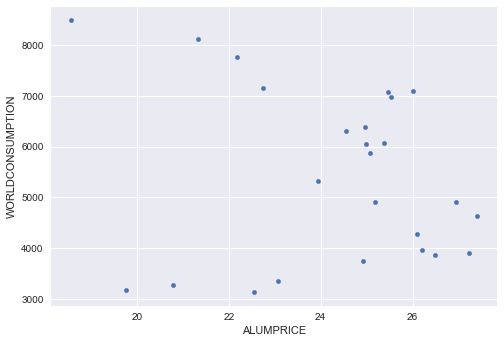

In [22]:
plt.style.use('seaborn')

prices['data'].plot(x='ALUMPRICE', y='WORLDCONSUMPTION', kind='scatter')    #to show relationship between worldconsumption and alumprice
plt.show()

The plot shows that there is no strongly relationship between alumprice and worldconsumption.

In [23]:
fish = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00504/qsar_fish_toxicity.csv',
                   sep=';',
                   header=None)
fish

,0,1,2,3,4,5,6
0,3.260,0.829,1.676,0,1,1.453,3.770
1,2.189,0.580,0.863,0,0,1.348,3.115
2,2.125,0.638,0.831,0,0,1.348,3.531
3,3.027,0.331,1.472,1,0,1.807,3.510
4,2.094,0.827,0.860,0,0,1.886,5.390
...,...,...,...,...,...,...,...
903,2.801,0.728,2.226,0,2,0.736,3.109
904,3.652,0.872,0.867,2,3,3.983,4.040
905,3.763,0.916,0.878,0,6,2.918,4.818
906,2.831,1.393,1.077,0,1,0.906,5.317


In [24]:
fish.columns

Int64Index([0, 1, 2, 3, 4, 5, 6], dtype='int64')

In [25]:
fish.mean()  

0    2.898129
1    0.628468
2    1.293591
3    0.229075
4    0.485683
5    2.109285
6    4.064431
dtype: float64

In [26]:
fish.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 908 entries, 0 to 907
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       908 non-null    float64
 1   1       908 non-null    float64
 2   2       908 non-null    float64
 3   3       908 non-null    int64  
 4   4       908 non-null    int64  
 5   5       908 non-null    float64
 6   6       908 non-null    float64
dtypes: float64(5), int64(2)
memory usage: 49.8 KB


In [27]:
X = fish.iloc[:,0:6]
y = fish.iloc[:,6]

In [28]:
X.head()

,0,1,2,3,4,5
0,3.260,0.829,1.676,0,1,1.453
1,2.189,0.580,0.863,0,0,1.348
2,2.125,0.638,0.831,0,0,1.348
3,3.027,0.331,1.472,1,0,1.807
4,2.094,0.827,0.860,0,0,1.886


In [29]:
y.head()

0    3.770
1    3.115
2    3.531
3    3.510
4    5.390
Name: 6, dtype: float64

In [30]:
model2 = LinearRegression().fit(X,y)
model2.predict(X)

array([3.85270344, 3.62859253, 3.70062376, 3.77711576, 4.11418414,
       2.48309342, 3.75456274, 4.15689266, 4.22004122, 3.34715883,
       3.33102079, 3.41579357, 3.83339167, 3.23747221, 3.17553527,
       2.53383539, 2.91659241, 2.66576725, 2.32619927, 4.07279484,
       2.76597052, 5.68402927, 5.19115243, 4.34058598, 4.83220479,
       4.81175404, 3.64089267, 3.37495475, 2.23845039, 4.21399743,
       3.47493302, 4.10464268, 2.10375476, 3.36841555, 3.44633385,
       3.97354392, 5.13381703, 4.09573408, 4.92170548, 4.45154831,
       3.56289053, 4.03059916, 4.49053558, 3.13418229, 5.7719364 ,
       3.2261849 , 3.28376351, 3.70787407, 5.12312694, 4.6405989 ,
       4.73414545, 4.85520698, 5.12590851, 4.20697572, 3.75456274,
       4.32457529, 3.52032764, 4.72214451, 3.96328051, 3.98672159,
       3.4516929 , 4.76164726, 3.77921554, 2.50301311, 3.4316691 ,
       2.93804787, 3.47216673, 3.09242304, 2.32018664, 2.15316978,
       2.04410496, 2.47364722, 2.22546656, 1.52614114, 2.66155

In [31]:
model2.score(X,y)

0.5771635677620812

In [32]:
X.corr()    

,0,1,2,3,4,5
0,1.000000,-0.235360,0.147622,0.121341,0.246639,0.463867
1,-0.235360,1.000000,-0.145967,-0.141401,0.163179,0.200663
2,0.147622,-0.145967,1.000000,-0.010657,0.092410,-0.450739
3,0.121341,-0.141401,-0.010657,1.000000,0.188164,0.048620
4,0.246639,0.163179,0.092410,0.188164,1.000000,0.028499
5,0.463867,0.200663,-0.450739,0.048620,0.028499,1.000000


In [33]:
model2.singular_

array([45.12209999, 27.3619314 , 20.20470864, 17.71288856, 10.83140394,
        8.37855242])

In [36]:
model2 = sm.ols('y~X', data=fish).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                      y   R-squared:                       0.577
Model:                            OLS   Adj. R-squared:                  0.574
Method:                 Least Squares   F-statistic:                     205.0
Date:                Mon, 28 Mar 2022   Prob (F-statistic):          1.33e-164
Time:                        21:35:22   Log-Likelihood:                -1238.0
No. Observations:                 908   AIC:                             2490.
Df Residuals:                     901   BIC:                             2524.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.1746      0.181     12.000      0.000       1.819       2.530
X[0]           0.3856      0.061      6.333      0.000       0.266       0.505
X[1]           1.2556      0.087     14.430      0.000       1.085       1.426
X[2]          -0.7464      0.101     -7.365      0.000      -0.945      -0.548
X[3]           0.4136      0.054      7.644      0.000       0.307       0.520
X[4]           0.0643      0.041      1.583      0.114      -0.015       0.144
X[5]           0.3901      0.034     11.555      0.000       0.324       0.456
==============================================================================
Omnibus:                      100.278   Durbin-Watson:                   1.979
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              379.239
Skew:                           0.468   Prob(JB):                     4.46e-83
Kurtosis:                       6.024   Cond. No.                         25.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Second variable negative effect on Sixth/target variable although other variables have possitive effect on it. Also, R-squared value is low. Therefore, model is not good fit.

In [35]:
anova_lm(model2)

,df,sum_sq,mean_sq,F,PR(>F)
X,6.0,1109.300051,184.883342,204.974601,1.330208e-164
Residual,901.0,812.685523,0.901982,NaN,NaN


In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet

In [40]:
interconnections = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/00211/CommViolPredUnnormalizedData.txt',
                               sep=',',
                               header=None)
interconnections

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
0,BerkeleyHeightstownship,NJ,39,5320,1,11980,3.10,1.37,91.78,6.50,...,14,114.85,138,1132.08,16,131.26,2,16.41,41.02,1394.59
1,Marpletownship,PA,45,47616,1,23123,2.82,0.80,95.57,3.44,...,57,242.37,376,1598.78,26,110.55,1,4.25,127.56,1955.95
2,Tigardcity,OR,?,?,1,29344,2.43,0.74,94.33,3.43,...,274,758.14,1797,4972.19,136,376.3,22,60.87,218.59,6167.51
3,Gloversvillecity,NY,35,29443,1,16656,2.40,1.70,97.35,0.50,...,225,1301.78,716,4142.56,47,271.93,?,?,306.64,?
4,Bemidjicity,MN,7,5068,1,11245,2.76,0.53,89.16,1.17,...,91,728.93,1060,8490.87,91,728.93,5,40.05,?,9988.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2210,Mercedcity,CA,?,?,10,56216,3.07,6.87,61.68,15.23,...,1376,2268.72,2563,4225.82,489,806.25,34,56.06,545.75,7356.84
2211,Pinevillecity,LA,?,?,10,12251,2.68,21.18,76.65,1.52,...,104,860.43,574,4748.9,24,198.56,2,16.55,124.1,5824.44
2212,Yucaipacity,CA,?,?,10,32824,2.46,0.52,92.62,0.98,...,628,1709.26,895,2435.97,179,487.19,8,21.77,353.83,4654.2
2213,Beevillecity,TX,?,?,10,13547,2.89,3.37,69.91,0.90,...,192,1508.01,474,3722.9,13,102.1,1,7.85,691.17,5340.87


In [41]:
interconnections.isnull().sum()

0      0
1      0
2      0
3      0
4      0
      ..
142    0
143    0
144    0
145    0
146    0
Length: 147, dtype: int64

In [42]:
interconnections.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2215 entries, 0 to 2214
Columns: 147 entries, 0 to 146
dtypes: float64(75), int64(29), object(43)
memory usage: 2.5+ MB


In [43]:
interconnections = interconnections.replace('?', np.nan) #it is used to avoid ? 
interconnections.dropna(inplace=True)

In [44]:
interconnections   #to show all data that ? replaced with a value.

,0,1,2,3,4,5,6,7,8,9,...,137,138,139,140,141,142,143,144,145,146
54,Toledocity,OH,95,77000,1,332943,2.54,19.70,76.96,1.05,...,5502,1698.29,15251,4707.51,4517,1394.26,357,110.19,984.96,7910.25
55,Philadelphiacity,PA,101,60000,1,1585577,2.63,39.86,53.52,2.74,...,15117,988.14,39181,2561.1,23785,1554.73,2282,149.17,1279.6,5253.14
58,Lynchburgcity,VA,680,47672,1,66049,2.63,26.41,72.45,0.76,...,560,833.83,2316,3448.48,184,273.97,50,74.45,753.42,4630.73
99,NewHaventown,CT,9,52070,1,130474,2.66,36.14,53.85,2.41,...,3417,2856.93,7719,6453.8,1873,1566,134,112.04,2127.02,10988.76
122,Springfieldcity,OH,23,74118,1,70487,2.59,17.38,81.61,0.51,...,963,1362.13,4048,5725.76,457,646.41,6,8.49,1497.92,7742.79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2086,WestAlliscity,WI,79,85300,10,63221,2.36,0.30,98.23,0.63,...,423,684.99,2059,3334.25,265,429.13,42,68.01,236.43,4516.38
2097,VirginiaBeachcity,VA,810,82000,10,393069,2.90,13.91,80.50,4.33,...,3261,748.01,14812,3397.57,1195,274.11,200,45.88,286.27,4465.56
2116,CherryHilltownship,NJ,7,12280,10,69348,2.83,3.23,89.79,6.14,...,612,846.79,2158,2985.9,424,586.66,5,6.92,208.93,4426.27
2200,FallRivercity,MA,5,23000,10,92703,2.49,1.03,97.17,1.33,...,334,371.47,707,786.32,419,466.01,0,0,640.62,1623.79


In [45]:
X = interconnections.iloc[:,2:147]
y = interconnections.iloc[:,2]

In [46]:
X.head()

,2,3,4,5,6,7,8,9,10,11,...,137,138,139,140,141,142,143,144,145,146
54,95,77000,1,332943,2.54,19.70,76.96,1.05,3.97,14.78,...,5502,1698.29,15251,4707.51,4517,1394.26,357,110.19,984.96,7910.25
55,101,60000,1,1585577,2.63,39.86,53.52,2.74,5.63,13.92,...,15117,988.14,39181,2561.1,23785,1554.73,2282,149.17,1279.6,5253.14
58,680,47672,1,66049,2.63,26.41,72.45,0.76,0.72,17.79,...,560,833.83,2316,3448.48,184,273.97,50,74.45,753.42,4630.73
99,9,52070,1,130474,2.66,36.14,53.85,2.41,13.22,17.06,...,3417,2856.93,7719,6453.8,1873,1566,134,112.04,2127.02,10988.76
122,23,74118,1,70487,2.59,17.38,81.61,0.51,0.65,16.05,...,963,1362.13,4048,5725.76,457,646.41,6,8.49,1497.92,7742.79


In [47]:
y.head()

54      95
55     101
58     680
99       9
122     23
Name: 2, dtype: object

In [48]:
model = LinearRegression()     #Linear Regression
model.fit(X,y)
1.0 - model.score(X,y)

0.0

In [49]:
model3 = Lasso()      #Lasso Regression
model3.fit(X,y)
1.0 - model3.score(X,y)

6.658918971780281e-10

In [50]:
model2 = Ridge()     #Ridge Regression
model2.fit(X,y)
1.0 - model2.score(X,y)

C:\Users\eysan.sans\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:187: LinAlgWarning: Ill-conditioned matrix (rcond=1.09741e-18): result may not be accurate.
  dual_coef = linalg.solve(K, y, sym_pos=True,


9.230061159826164e-12

In [51]:
model4 = ElasticNet() 
model4.fit(X,y)
1.0 - model4.score(X,y)

6.565347154818824e-10